In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

class Value:

    def __init__(self, data, children = (), _op = '', label = ''):
        self.data = data
        self._prev  = set(children)
        self._op = _op
        self.grad = 0.0
        self.label = label
    
    def __repr__(self):
        return f"Value of {self.label} (data={self.data}) op {self._op}"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out
a = Value (2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e+c; d.label= 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L


Value of L (data=-8.0) op *

In [39]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4.0 

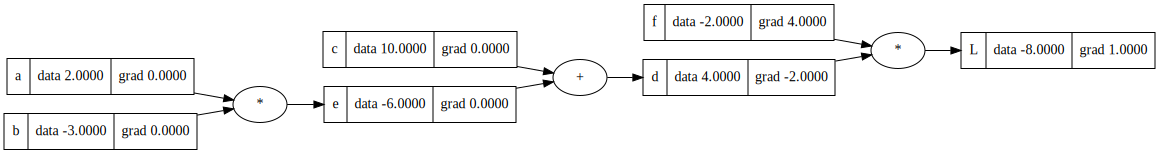

In [40]:
draw_dot(L)

In [5]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

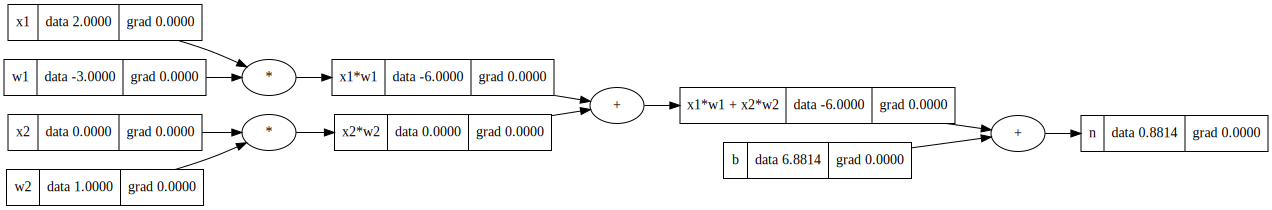

In [6]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
draw_dot(n)
o = n.tanh(); o.label = 'o'

In [38]:
import sys
sys.executable
'c:\Users\Z004V3HN\AppData\Local\Programs\Python\Python310\python.exe'

'c:\\Users\\Z004V3HN\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [14]:
xx= ()
len(xx)

0

In [13]:
import torch
probs = torch.tensor([0.4, 0.8], requires_grad=True)

logprobs = probs.log()
logprobs.backward()
logprobs.grad

RuntimeError: grad can be implicitly created only for scalar outputs